## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
sns.set(style='ticks',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"], indicator=True)

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,_merge
0,k403,Ramicane,Male,21,16,0,45.000000,0,both
1,k403,Ramicane,Male,21,16,5,38.825898,0,both
2,k403,Ramicane,Male,21,16,10,35.014271,1,both
3,k403,Ramicane,Male,21,16,15,34.223992,1,both
4,k403,Ramicane,Male,21,16,20,32.997729,1,both
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,both
1889,z969,Naftisol,Male,9,30,30,65.841013,3,both
1890,z969,Naftisol,Male,9,30,35,69.176246,4,both
1891,z969,Naftisol,Male,9,30,40,70.314904,4,both


In [3]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [4]:
#total rows - to compare with count after dropping duplicates
df["Mouse ID"].count()

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. - received help from LA
duplicate_mice = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_index = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].index
duplicate_data = df.iloc[duplicate_index]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,_merge
909,g989,Propriva,Female,21,26,0,45.000000,0,both
911,g989,Propriva,Female,21,26,5,47.570392,0,both
913,g989,Propriva,Female,21,26,10,49.880528,0,both
915,g989,Propriva,Female,21,26,15,53.442020,0,both
917,g989,Propriva,Female,21,26,20,54.657650,1,both


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,_merge
0,k403,Ramicane,Male,21,16,0,45.000000,0,both
1,k403,Ramicane,Male,21,16,5,38.825898,0,both
2,k403,Ramicane,Male,21,16,10,35.014271,1,both
3,k403,Ramicane,Male,21,16,15,34.223992,1,both
4,k403,Ramicane,Male,21,16,20,32.997729,1,both
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,both
1889,z969,Naftisol,Male,9,30,30,65.841013,3,both
1890,z969,Naftisol,Male,9,30,35,69.176246,4,both
1891,z969,Naftisol,Male,9,30,40,70.314904,4,both


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].count()

1888

In [9]:
# still have the same number of unique Mouse IDs
clean_df["Mouse ID"].nunique()

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [16]:
grouped_mean = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].mean()

grouped_median = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].median()

grouped_var = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].var()

grouped_std = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].std()

grouped_sem = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].sem()


In [17]:
#merging mean and median dfs
summary_stats = pd.merge(grouped_mean,grouped_median, on='Drug Regimen')

#renaming columns as they're merged into the new DF
summary_stats = summary_stats.rename(columns={"Tumor Volume (mm3)_x" : "Mean of Tumor Volume" , "Tumor Volume (mm3)_y":"Median of Tumor Volume"})

#merging mean&median with variance, and renaming that new column
summary_stats = pd.merge(summary_stats, grouped_var, on='Drug Regimen')
summary_stats = summary_stats = summary_stats.rename(columns={"Tumor Volume (mm3)" : "Variance of Tumor Volume"})

#merging mean&median&variance with standard deviation, and renaming that new column
summary_stats = pd.merge(summary_stats, grouped_std, on='Drug Regimen')
summary_stats = summary_stats = summary_stats.rename(columns={"Tumor Volume (mm3)" : "Standard Deviation of Tumor Volume"})

#merging mean&median&variance&standard deviation with standard error of the mean, and renaming that new column
summary_stats = pd.merge(summary_stats, grouped_sem, on='Drug Regimen')
summary_stats = summary_stats = summary_stats.rename(columns={"Tumor Volume (mm3)" : "SEM of Tumor Volume"})

summary_stats

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [19]:
sum_stats_agg = clean_df.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']}) 
sum_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Number of Timepoints for All Mice Tested for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Number of Timepoints for All Mice Tested'>

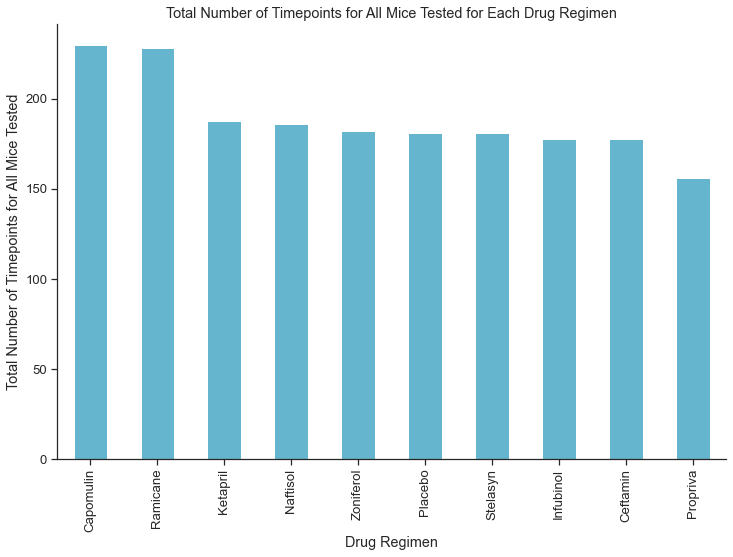

In [71]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# counting entries for each drug regimen
total_timepoints = clean_df["Drug Regimen"].value_counts()
#print(total_timepoints)

total_timepoints.plot.bar(title="Total Number of Timepoints for All Mice Tested for Each Drug Regimen",xlabel="Drug Regimen",ylabel="Total Number of Timepoints for All Mice Tested",  color='c')
#plt.xticks(rotation="45", ha="right")

Text(0, 0.5, 'Total Number of Timepoints for All Mice Tested')

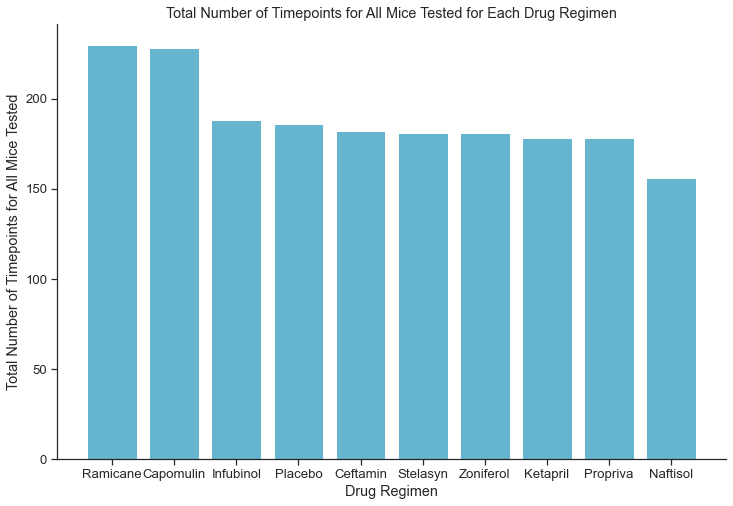

In [72]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# creating list of unique Drug Regimen names for x axis, using total_timepoints for y axis (created in cell above)
drug_regimen = clean_df["Drug Regimen"].unique()

plt.bar(drug_regimen,total_timepoints, color='c')
plt.title("Total Number of Timepoints for All Mice Tested for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints for All Mice Tested")


In [22]:
# counting number of mice labeled Male and Female
sex_distr = clean_df.Sex.value_counts()

<AxesSubplot:title={'center':'Distribution of Female Versus Male Mice'}, ylabel='Sex'>

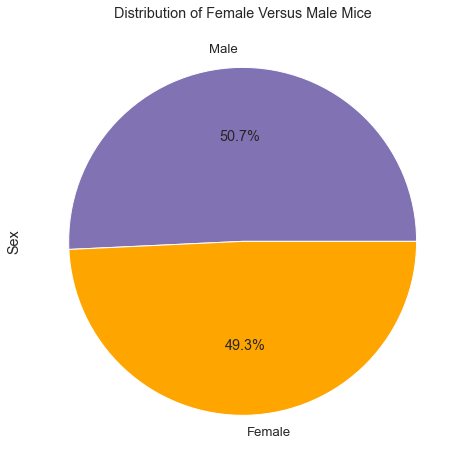

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ["m","orange"]
sex_distr.plot.pie(labels=sex_distr.index, autopct="%1.1f%%", title="Distribution of Female Versus Male Mice", colors=colors )


Text(0.5, 1.0, 'Distribution of Female Versus Male Mice')

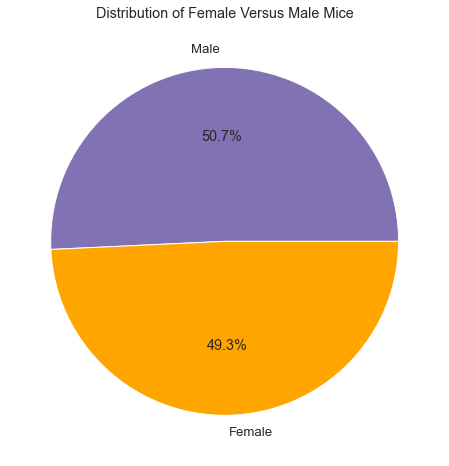

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_distr,labels=sex_distr.index, autopct="%1.1f%%", colors=colors)
plt.title("Distribution of Female Versus Male Mice")

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# , Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [26]:
#sort clean_df by timepoint, descending order
sorted_df = clean_df.sort_values(by=['Timepoint'], ascending=False)

#drop duplicate Mouse IDs, keeping the row where the first value appears aka the greatest timepoint bc it was sorted from high to low
last_timepoints_df = sorted_df.drop_duplicates(subset=['Mouse ID'], keep='first')

In [27]:
last_timepoints_df.reset_index(drop=True)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,_merge
0,z969,Naftisol,Male,9,30,45,73.867845,4,both
1,f345,Infubinol,Male,23,26,45,60.918767,1,both
2,i635,Propriva,Male,21,26,45,58.633404,3,both
3,r554,Capomulin,Female,8,17,45,32.377357,3,both
4,h246,Ketapril,Male,13,30,45,74.104086,2,both
...,...,...,...,...,...,...,...,...,...
244,d133,Zoniferol,Male,5,30,0,45.000000,0,both
245,b447,Ceftamin,Male,2,30,0,45.000000,0,both
246,t573,Ceftamin,Female,15,27,0,45.000000,0,both
247,f932,Ketapril,Male,15,29,0,45.000000,0,both


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ["Capomulin", "Ramicane", "Infubinol",  "Ceftamin"]

In [29]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

In [30]:
#loop through df by row/index #
for i in range(len(last_timepoints_df)):
    #loop through list of drug regimens
    for d in drug_regimen:
        #if current row's drug regimen column (column 1) contains a regimen within the list (drug_regimen)
        if last_timepoints_df.iloc[i,1] == d:
            #then add the tumor volume from that row (column 6) to the list
            tumor_vol.append(last_timepoints_df.iloc[i,6])
#tumor_vol

In [31]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [32]:
#filter df with the last timepoint of each mouse to only include mice in the specified drug regimens
filtered_timepoints_df = last_timepoints_df.loc[(last_timepoints_df["Drug Regimen"] == "Capomulin") | (last_timepoints_df["Drug Regimen"] == "Ramicane") | (last_timepoints_df["Drug Regimen"] == "Infubinol") | (last_timepoints_df["Drug Regimen"] == "Ceftamin")]
#filtered_timepoints_df

In [33]:
#set variable for column of mouse tumor volume data
final_volumes = filtered_timepoints_df["Tumor Volume (mm3)"]

#code from class to calculate quartiles and bounds
quartiles = final_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volume is: 37.1877438025
The upper quartile of final tumor volume is: 59.930261755
The interquartile range of final tumor volume is: 22.742517952499995
The the median of final tumor volume is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


In [34]:
outlier_mouse_id = []
for i in range(len(filtered_timepoints_df)):
    if (last_timepoints_df.iloc[i,6] > upper_bound) | (last_timepoints_df.iloc[i,6] < lower_bound):
        #then add the mouse id from that row (column 0) to the list
        outlier_mouse_id.append(last_timepoints_df.iloc[i,0])
        
print(outlier_mouse_id)
#shows no outliers

[]


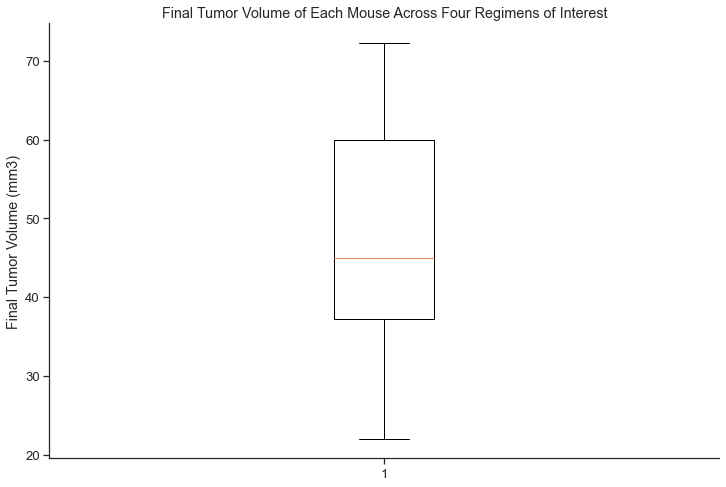

In [60]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse Across Four Regimens of Interest")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol, sym="p", flierprops=dict(color="blue"))
plt.show()

## Line and Scatter Plots

In [36]:
# Generate a line plot of tumor volume vs. time point for one mouse treated with Capomulin

In [44]:
# creating df with only capomulin info
capomulin_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,_merge
10,s185,Capomulin,Female,3,17,0,45.000000,0,both
11,s185,Capomulin,Female,3,17,5,43.878496,0,both
12,s185,Capomulin,Female,3,17,10,37.614948,0,both
13,s185,Capomulin,Female,3,17,15,38.177232,0,both
14,s185,Capomulin,Female,3,17,20,36.866876,0,both
...,...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1,both
1452,r157,Capomulin,Male,22,25,0,45.000000,0,both
1453,r157,Capomulin,Male,22,25,5,45.597064,0,both
1454,r157,Capomulin,Male,22,25,10,46.059608,0,both


In [45]:
#picking mouse with ID s185 for the line plot
sample_mask = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
sample_mask

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,_merge
10,s185,Capomulin,Female,3,17,0,45.000000,0,both
11,s185,Capomulin,Female,3,17,5,43.878496,0,both
12,s185,Capomulin,Female,3,17,10,37.614948,0,both
13,s185,Capomulin,Female,3,17,15,38.177232,0,both
14,s185,Capomulin,Female,3,17,20,36.866876,0,both
15,s185,Capomulin,Female,3,17,25,33.949940,0,both
16,s185,Capomulin,Female,3,17,30,32.959671,1,both
17,s185,Capomulin,Female,3,17,35,28.328531,1,both
18,s185,Capomulin,Female,3,17,40,25.472143,1,both
19,s185,Capomulin,Female,3,17,45,23.343598,1,both


Text(0, 0.5, 'Tumor Volume (mm3)')

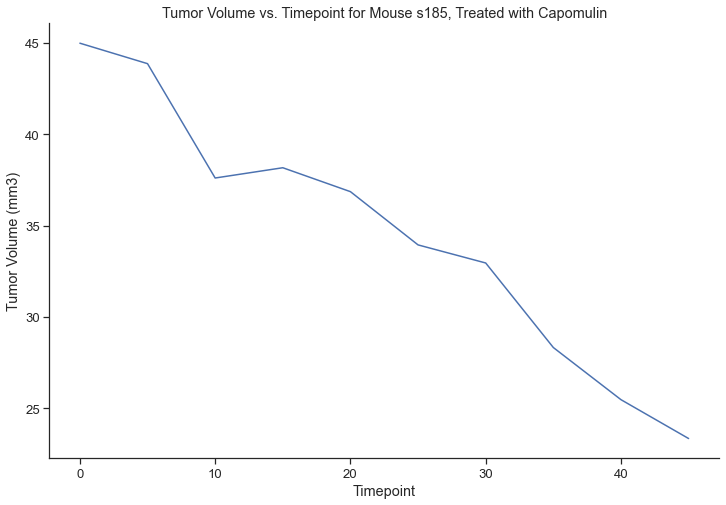

In [46]:
x_timepoint = sample_mask["Timepoint"]
y_tumor_volume = sample_mask["Tumor Volume (mm3)"]
plt.plot(x_timepoint, y_tumor_volume)
plt.title("Tumor Volume vs. Timepoint for Mouse s185, Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

In [47]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [48]:
#calculating avg tumor volume within each weight value
mean_volume_df = capomulin_df.groupby("Weight (g)").agg({"Tumor Volume (mm3)" : "mean"})

#creating df and renaming avg column
mean_volume_df = mean_volume_df.astype("int64").reset_index()
mean_volume_df = mean_volume_df.rename(columns={"Tumor Volume (mm3)":"Avg Tumor Volume (mm3)"})

Text(0, 0.5, 'Average Tumor Volume')

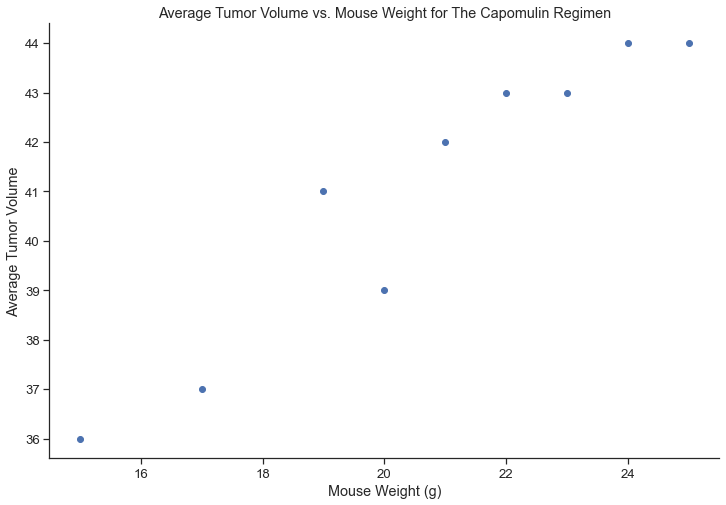

In [49]:
#setting columns to x and y axis variables
x_weight = mean_volume_df["Weight (g)"]
y_avg_volume = mean_volume_df["Avg Tumor Volume (mm3)"]

plt.scatter(x_weight,y_avg_volume)
plt.title("Average Tumor Volume vs. Mouse Weight for The Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume")

## Correlation and Regression

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [51]:
#calculating correlation using variables created above with columns for weight and avg tumor volume
capomulin_corr = st.pearsonr(x_weight,y_avg_volume)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(capomulin_corr[0],2)}")

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.95


The r-squared is: 0.9084302325581398


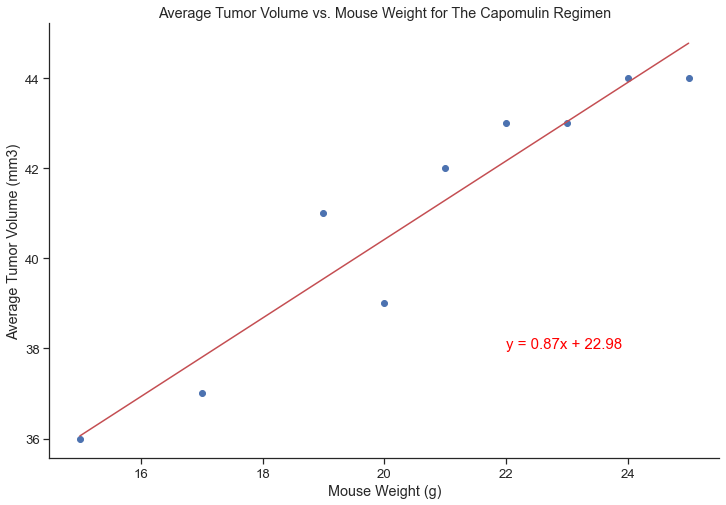

In [52]:
#linear regression code from class example
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_weight, y_avg_volume)
regress_values = x_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_weight,y_avg_volume)
plt.plot(x_weight,regress_values,"r-")
plt.annotate(line_eq,(22,38),fontsize=15,color="red")
plt.title("Average Tumor Volume vs. Mouse Weight for The Capomulin Regimen")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()